In [1]:
from __future__ import division
import morphs
from morphs.data import xcor, derivative

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import itertools

In [3]:
def reconstruct_xcor(popt):
    sampled_points = list(itertools.combinations_with_replacement(np.arange(1, 129), 2))
    x, y = zip(*sampled_points) # because py2 doesn't do unpacking in a list :(
    xyz = np.array(
        [x, y, derivative.integrate_pairs(popt, sampled_points)]
    ).T
    xyz = xcor.xyz_vf2sf(xyz)
    morph_pos_list, grid = xcor.xyz_to_sp(xyz)
    return grid

In [4]:
def plt_recon_xcor(grid, morph_dim=False):
    ax = plt.gca()
    ax.imshow(-grid)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel("Morph Position")
    ax.set_xlabel("Morph Position")
    if morph_dim:
        ax.set_title("{}     to     {}".format(*morph_dim.upper()))
    return ax

In [5]:
dd = morphs.load.derivative_dict()
ddf = morphs.load.derivative_df()

In [6]:
morph_dim = "ac"
for selected_block_path in dd:
    if (
        "Pen01_Lft_AP2500_ML500__Site06_Z3000__B1183_cat_P01_S06_5"
        in selected_block_path
    ):
        break
popt = dd[selected_block_path][morph_dim][4]

In [7]:
grid = reconstruct_xcor(popt)

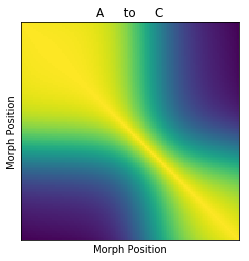

In [8]:
ax = plt_recon_xcor(grid, morph_dim)

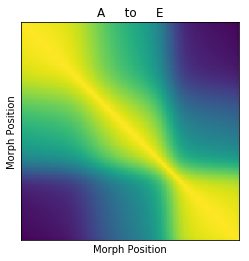

In [9]:
morph_dim = "ae"
count = 0
grid = np.zeros((128, 128))
for block_path in dd:
    popt = dd[block_path][morph_dim][4]
    grid += reconstruct_xcor(popt)
    count += 1
ax = plt_recon_xcor(grid / count, morph_dim)

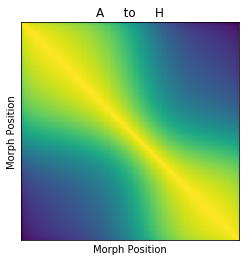

In [10]:
morph_dim = "ah"
count = 0
grid = np.zeros((128, 128))
for block_path in dd:
    popt = dd[block_path][morph_dim][4]
    grid += reconstruct_xcor(popt)
    count += 1
ax = plt_recon_xcor(grid / count, morph_dim)